In [1]:
!pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 1.6 MB 43.8 MB/s 


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow as cv2
from itertools import product
from keras import models,layers
from PIL import Image
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import glob
import os
import csv
import math 
import json
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#gpu_info = !nvidia-smi
#gpu_info = '\n'.join(gpu_info)
#if gpu_info.find('failed') >= 0:
#  print('Not connected to a GPU')
#else:
#  print(gpu_info)

Mon Aug 22 05:33:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
joined=pd.read_parquet("/content/drive/MyDrive/train.parquet",engine='fastparquet')
joined=joined.drop(labels="r_id", axis=1)

In [4]:
joined_validation=pd.read_parquet("/content/drive/MyDrive/val.parquet",engine='fastparquet')
joined_test=pd.read_parquet("/content/drive/MyDrive/test.parquet",engine='fastparquet')

In [5]:
joined_test=joined_test.drop(labels="r_id", axis=1)

In [6]:
joined_validation=joined_validation.drop(labels="r_id", axis=1)

In [8]:
#80% of whole dataset as training set
training = joined.iloc[: , 0:11]
testing = joined_test.iloc[: , 0:11]
validing = joined_validation.iloc[: , 0:11]
labelsForTrain=joined.iloc[: , -1]
labelsForValid=joined_validation.iloc[: , -1]
labelsForTest=joined_test.iloc[: , -1]
#testing_labels = labelsForcool[training_size:]
#model.summary()

In [9]:
joined.shape

(2060626, 12)

In [10]:
#make sure the last column not included
print(training.shape)
print(testing.shape)
print(validing.shape)

(2060626, 11)
(257579, 11)
(257578, 11)


In [11]:

model = Sequential(
    [
     Dense(100, activation='relu', input_shape=(11,)),
     Dense(10, activation='relu'),
     Dense(1),
     ])
model.build(input_shape=(11,1))
model.compile(optimizer='sgd', loss='mse',metrics=['mse'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(training, labelsForTrain, epochs=20, validation_data=(validing, labelsForValid), verbose=2)

Epoch 1/20
64395/64395 - 84s - loss: 62.8112 - mse: 62.8112 - val_loss: 137.6031 - val_mse: 137.6031 - 84s/epoch - 1ms/step
Epoch 2/20
64395/64395 - 83s - loss: 62.2191 - mse: 62.2191 - val_loss: 137.5898 - val_mse: 137.5898 - 83s/epoch - 1ms/step
Epoch 3/20
64395/64395 - 85s - loss: 62.2291 - mse: 62.2291 - val_loss: 137.7013 - val_mse: 137.7013 - 85s/epoch - 1ms/step
Epoch 4/20
64395/64395 - 85s - loss: 62.2229 - mse: 62.2229 - val_loss: 137.5836 - val_mse: 137.5836 - 85s/epoch - 1ms/step
Epoch 5/20
64395/64395 - 86s - loss: 62.2189 - mse: 62.2189 - val_loss: 137.5837 - val_mse: 137.5837 - 86s/epoch - 1ms/step
Epoch 6/20
64395/64395 - 85s - loss: 62.2202 - mse: 62.2202 - val_loss: 137.5816 - val_mse: 137.5816 - 85s/epoch - 1ms/step
Epoch 7/20
64395/64395 - 85s - loss: 62.2207 - mse: 62.2207 - val_loss: 137.5815 - val_mse: 137.5815 - 85s/epoch - 1ms/step
Epoch 8/20
64395/64395 - 85s - loss: 62.2174 - mse: 62.2174 - val_loss: 137.5890 - val_mse: 137.5890 - 85s/epoch - 1ms/step
Epoch 9/

In [21]:
hist = pd.DataFrame(history.history)
hist

,loss,mse,val_loss,val_mse
0,62.811195,62.811195,137.603088,137.603088
1,62.219093,62.219093,137.589783,137.589783
2,62.229099,62.229099,137.701279,137.701279
3,62.222935,62.222935,137.583603,137.583603
4,62.218857,62.218857,137.583740,137.583740
5,62.220215,62.220215,137.581650,137.581650
6,62.220661,62.220661,137.581482,137.581482
7,62.217430,62.217430,137.589035,137.589035
8,62.222778,62.222778,137.583817,137.583817
9,62.222557,62.222557,137.586975,137.586975


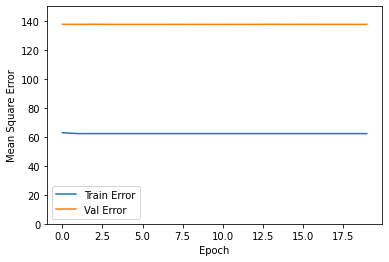

In [15]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,150])
  plt.legend()
  plt.show()


plot_history(history)

In [22]:
summation = 0  #variable to store the summation of differences
test_predictions = model.predict(testing).flatten()
val_predictions = model.predict(validing).flatten()
n = len(test_predictions) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = labelsForTest[i] - test_predictions[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
RMSE = math.sqrt(MSE)
print ("The Mean Square Error is: " , MSE)
print ("The Root Mean Square Error is: " , RMSE)

The Mean Square Error is:  9.267538736571629
The Root Mean Square Error is:  3.0442632502087643


In [17]:
MAE_test=tf.keras.metrics.mean_absolute_error(
    labelsForTest, test_predictions
)
MAE_test

<tf.Tensor: shape=(), dtype=float32, numpy=0.17916243>

In [25]:
MAE_val=tf.keras.metrics.mean_absolute_error(
    labelsForValid, val_predictions
)
MAE_val

<tf.Tensor: shape=(), dtype=float32, numpy=0.20991538>

In [26]:
train_predictions = model.predict(training).flatten()
MAE_train=tf.keras.metrics.mean_absolute_error(
    labelsForTrain, train_predictions
)
MAE_train

<tf.Tensor: shape=(), dtype=float32, numpy=0.2022477>

In [19]:
#
#model = Sequential(
#    [
#     Dense(12, activation='relu', input_shape=(11,)),
#     Dense(12, activation='relu'),
#     Dense(training.size),
#     ])
#model.build(input_shape=(11,1))
#model.compile(optimizer='sgd', loss='mse',metrics=['accuracy'])
#model.summary()


#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(12, activation='relu'),
#    tf.keras.layers.Dense(8, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])
#model.build(input_shape=(13,2))
#model.compile(optimizer='sgd', loss='mse',metrics=['accuracy'])
#model.summary()



In [18]:
#num_epochs = 50
#history = model.fit(training, labelsForTrain, epochs=num_epochs, validation_data=(validing, labelsForValid), verbose=2)

In [20]:
#vocab_size = 50000
#embedding_dim = 16
#max_length = 200
#model = tf.keras.Sequential([
#    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#    tf.keras.layers.Dense(24, activation='relu'),
#    tf.keras.layers.Dense(8, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])


#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

In [ ]:
# Check list: 
#1. Review rating 
#2. Review Rating Extremity (?)
#3. Word Count
#4. User No of friends
#5. User review count
#6. User Age of account (months)
#7. Restaurant avg. rating
#8. Restaurant review count
#9. Review text total sentiment polarity score of each sentence / total # sentences (need to be done)
#10. Subjectivity score (subjective vs objective)
#11. Readability

Below is the code for extracting the RGB data

In [ ]:
#with open('output_file.csv', 'w', newline='') as f_output:
 #   csv_output = csv.writer(f_output)
  #  csv_output.writerow(["img_name", "R", "G", "B"])

with open("RGB.json", "w") as outfile:
    for img_path in glob.glob("/content/drive/MyDrive/photos/*.jpg"):
    #img_path = '/content/drive/MyDrive/test/--3P3fjPrScy06XVLi4vhg.jpg'
     try:
      image = Image.open(img_path)
      img_name = os.path.basename(img_path)
      # Number of prime color we gonna extrace

      num_colors=1

      #Generate small image for calculation
      small_image=image.resize((20,20))

      result=small_image.convert('P',palette=Image.ADAPTIVE,colors=num_colors)
      result=result.convert('RGB')

      main_colors = result.getcolors(80*80)
      main_rgb = main_colors[0][1]
      #csv_output.writerows([img_name, map(lambda x: [x], main_rgb)])
      # Data to be written
      dictionary ={
          "r_name": img_name,
          "R": main_rgb[0],
          "G": main_rgb[1],
          "B": main_rgb[2]
      }
      outfile.write('\n')
      json.dump(dictionary, outfile)
     except:
      print(img_name)

oIlZM9LN-Ol_WfQQQpg0Zw.jpg


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:1015: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


0GJJhj1lh8V6zLeLkFwbyQ.jpg
Va9Zo6Y6zrWzpm9iV4GXZw.jpg
mKI1GpWQMs2rckjI3D9dhw.jpg
2q_8hrvKQCFD18MyJzoVmw.jpg
pm5uBNJCVRB3kZXq1eOyiA.jpg
6qqRxbjA2HquZZnNQrvxEQ.jpg
MDF6GetsTNRYWyIzzxea7A.jpg
HNgnhFdN15zIw8HzsRzWOA.jpg
Z7r1dYDC9eR6DQq01yGU-Q.jpg
O8eLVHCthPJuv02-EY7GdA.jpg
bWnSyaeOJgbykBL56ldM9w.jpg
ogQp0M7B1OiS8AqP55eirQ.jpg
A7FepQWBzC9eIXDUYImtbQ.jpg
HyFN7L1PYIeTTBTY2-G6ZQ.jpg
phGmoKO6rJpyQo8TDQofqQ.jpg
Qi-lxakzwDIPVRFPyvMpUQ.jpg
c9KWE6TeU4tRRkhxuYJCAQ.jpg
NX1a9ZNo8a34RuALiBqROw.jpg
lz-22DatK0pT7CkGLg7OgQ.jpg
EhqaIciplglkJBPvufErUA.jpg
JmWCtmZ1V3NrSTHs0mB4OA.jpg
-_seY1mjA62XKXwi5FZGBQ.jpg
Na1sCel7pdY2CRQnWBo84g.jpg
QuxU8mtIK7P-glLX7kZmog.jpg


In [ ]:
#data= pd.read_json('/content/RGB.json', lines=True, orient='records')
data= pd.read_json(open("/content/drive/MyDrive/RGB.json", "r"), lines = True)
data.head()

,photo_id,R,G,B
0,--0h6FMC0V8aMtKQylojEg,108,97,87
1,--3JQ4MlO-jHT9xbo7liug,165,134,122
2,--3P3fjPrScy06XVLi4vhg,119,101,82
3,--4DfhW2sJvjeC90KEDX3g,139,126,111
4,--5V3mRlhb3zqE5yF4Gpaw,108,98,88


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
for filename in glob.glob("/content/drive/MyDrive/test/20GZaQkAup3g1U9ENd-bcQ.jpg"):
    image = Image.open(filename) 
    img_name = os.path.basename(filename)
    ## Number of prime color we gonna extrace
    num_colors=1

    #Generate small image for calculation
    small_image=image.resize((20,20))

    result=small_image.convert('P',colors=num_colors)
    result=result.convert('RGB')

    main_colors = result.getcolors(20*20)
    main_rgb = main_colors[0][1]
    print(main_rgb)


(255, 51, 51)


In [ ]:
#Open a file to write the pixel data
from itertools import product
from PIL import Image
import glob
import os
import csv

#Open a file to write the pixel data
with open('output_file.csv', 'w', newline='') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerow(["img_name", "R", "G", "B"])

    #Path to file 
    for filename in glob.glob("*.jpg"):
        im = Image.open(filename) 
        img_name = os.path.basename(filename)

        #Load the pixel info
        pix = im.load()

        #Get a tuple of the x and y dimensions of the image
        width, height = im.size

        print(f'{filename}, Width {width}, Height {height}') # show 

        #Read the details of each pixel and write them to the file
        csv_output.writerows([img_name, *pix[x,y]] for x, y in product(range(width), range(height)))

--3JQ4MlO-jHT9xbo7liug.jpg, Width 400, Height 400


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
